<a href="https://colab.research.google.com/github/44REAM/RA-Medphys/blob/main/Class2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy import signal
from scipy.fft import fft, fftfreq, fftshift, ifftshift, ifft

# Work

# NumPy


NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

## NumPy fundamentals

### เราสามารถสร้าง numpy array จาก list ปกติใน python ได้

In [ ]:
# array 1 มิติ
numpy_array_1d = np.array([1,2,3,4])
print(numpy_array_1d)

# shape ของ array
print(numpy_array_1d.shape)


[1 2 3 4]
(4,)


In [ ]:
# array 2 มิติ (หรือ matrix)
numpy_array_2d = np.array([[1, 2], [3, 4]])
print(numpy_array_2d)

# shape ของ array
print(numpy_array_2d.shape)


[[1 2]
 [3 4]]
(2, 2)


In [ ]:
# ชนิดของตัวแปร numpy_array_2d
print(type(numpy_array_2d))

# ข้างใน numpy array เก็บ integer ข้างใน
print(numpy_array_2d.dtype)

# array 2 มิติ (หรือ matrix)
numpy_array_2d_float = np.array([[1.2, 2.6], [3.3, 4.9]])
print(numpy_array_2d_float)
# ข้างใน numpy array เก็บ float ข้างใน
print(numpy_array_2d_float.dtype)



<class 'numpy.ndarray'>
int64
[[1.2 2.6]
 [3.3 4.9]]
float64


### สร้าง numpy array ด้วย function ใน numpy

https://numpy.org/doc/stable/user/basics.creation.html

ไม่จำเป็นต้องจำทั้งหมด จำไม่ได้ก็สามารถเขียนโปรแกรมได้เช่นกัน แต่อาจจะช้ากว่าคนที่จำได้

In [ ]:
# np.arange(เริ่ม, หยุด, เพิ่มที่ละเท่าไร  = 1)

x = np.arange(2, 10)
print(x)

x = np.arange(2, 10, 0.5)
print(x)

[2 3 4 5 6 7 8 9]
[2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.  9.5]


In [ ]:
# np.linspace(เริ่ม, หยุด, จำนวน item ใน array = 50)

x = np.linspace(2, 10)
print(x)

x = np.linspace(2, 10, 5)
print(x)

[ 2.          2.16326531  2.32653061  2.48979592  2.65306122  2.81632653
  2.97959184  3.14285714  3.30612245  3.46938776  3.63265306  3.79591837
  3.95918367  4.12244898  4.28571429  4.44897959  4.6122449   4.7755102
  4.93877551  5.10204082  5.26530612  5.42857143  5.59183673  5.75510204
  5.91836735  6.08163265  6.24489796  6.40816327  6.57142857  6.73469388
  6.89795918  7.06122449  7.2244898   7.3877551   7.55102041  7.71428571
  7.87755102  8.04081633  8.20408163  8.36734694  8.53061224  8.69387755
  8.85714286  9.02040816  9.18367347  9.34693878  9.51020408  9.67346939
  9.83673469 10.        ]
[ 2.  4.  6.  8. 10.]


In [ ]:
a = np.array([1, 2, 3, 4, 5, 6])

# indexing, slicing เหมือน list
print(a[1])

print(a[1:3])

2
[2 3]


### Vectorization

จากการที่เราต้องทำ operation ที่ละตัวเราจะสามารถเปลี่ยนการทำ operation ที่ตัวให้เป็น vector-based operation ได้

In [ ]:
x = [1,2,3,4]
y = []
for item in x:
    # ใส่ข้อมูล item ที่อยู่ใน x บวกเข้าไป 1 แล้วเก็บใน y
    y.append(item+1)
print(y)


[2, 3, 4, 5]


In [ ]:
x = np.array([1,2,3,4])
y = np.array([])
for item in x:
    # ใส่ข้อมูล item ที่อยู่ใน x บวกเข้าไป 1 แล้วเก็บใน y
    y = np.append(y, item)
print(y)

[1. 2. 3. 4.]


numpy ทำให้การเขียนโปรแกรมของเราง่ายขึ้นด้วยการ vectorization

In [ ]:
x = np.array([1,2,3,4])
x + 1

array([2, 3, 4, 5])

In [ ]:
# error
x = [1,2,3,4]
x + 1

TypeError: ignored

In [ ]:
# บวก array
x = np.array([1, 2, 3, 4])
y = np.array([4, 5, 6, 7])
z = x+y

print(z)

[ 5  7  9 11]


In [ ]:

x = [1, 2, 3, 4]
y = [4, 5, 6, 7]
z = x+y
print(z)

[1, 2, 3, 4, 4, 5, 6, 7]


In [ ]:
x = [1, 2, 3, 4]
y = [4, 5, 6, 7]
z = []

for i, j in zip(x, y):
  z.append(i + j)
print(z)

[5, 7, 9, 11]


In [ ]:
arr1 = np.array([10, 20, 30, 40, 50, 60])
arr2 = np.array([20, 21, 22, 23, 24, 25])

newarr = arr1*arr2

print(newarr)

[ 200  420  660  920 1200 1500]


In [ ]:
x= np.array([1,2,3,4])
print(np.exp(x))

x= [1,2,3,4]
print(np.exp(x))

[ 2.71828183  7.3890561  20.08553692 54.59815003]
[ 2.71828183  7.3890561  20.08553692 54.59815003]


In [6]:
x>3

array([False, False, False,  True])

In [3]:
x = np.array([1,2,3,4])
x[[True, False, True, False]]

array([1, 3])

In [8]:
x[x>2]

array([3, 4])

In [1]:
x = [1,2,3,4]
x[[True, False, True, False]]

TypeError: ignored

# Matplotlib

https://matplotlib.org/stable/tutorials/introductory/quick_start.html#sphx-glr-tutorials-introductory-quick-start-py

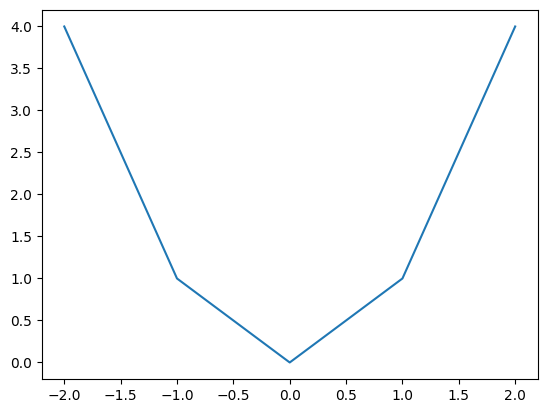

In [ ]:
import matplotlib.pyplot as plt

x= np.array([-2,-1,0,1,2])
y = x**2
# plt.plot(ข้อมูลแกน x, ข้อมูลแกน y)
plt.plot(x, y)

# Basis function

## Quadratic functions

$$y = ax^2 + bx + c$$
$a\neq 0, b,c \ \text{constant} $



In [ ]:
def quadratic(x, a = 1, b = 0, c = 0):
    return a*x**2 + b*x + c

x = 1
y = quadratic(x)
print(y)

1


In [ ]:
# https://numpy.org/doc/stable/reference/generated/numpy.arange.html
x = np.arange(-2,2, 0.1)
y = quadratic(x)
print(y)

[4.00000000e+00 3.61000000e+00 3.24000000e+00 2.89000000e+00
 2.56000000e+00 2.25000000e+00 1.96000000e+00 1.69000000e+00
 1.44000000e+00 1.21000000e+00 1.00000000e+00 8.10000000e-01
 6.40000000e-01 4.90000000e-01 3.60000000e-01 2.50000000e-01
 1.60000000e-01 9.00000000e-02 4.00000000e-02 1.00000000e-02
 3.15544362e-30 1.00000000e-02 4.00000000e-02 9.00000000e-02
 1.60000000e-01 2.50000000e-01 3.60000000e-01 4.90000000e-01
 6.40000000e-01 8.10000000e-01 1.00000000e+00 1.21000000e+00
 1.44000000e+00 1.69000000e+00 1.96000000e+00 2.25000000e+00
 2.56000000e+00 2.89000000e+00 3.24000000e+00 3.61000000e+00]


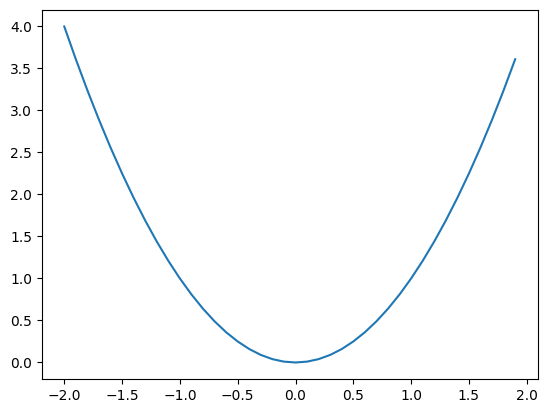

In [ ]:

plt.plot(x,y)


## Trigonometric functions

$$y = sin (x)$$
$$y = cos (x)$$

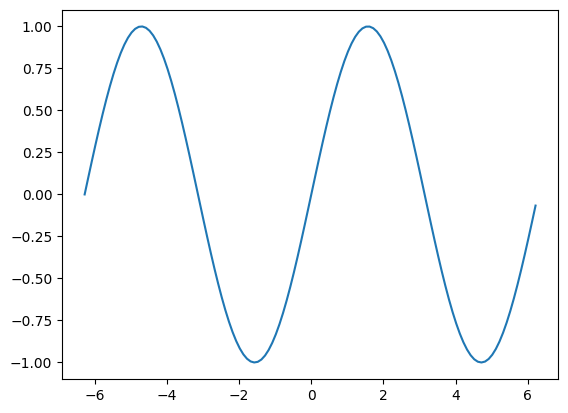

In [ ]:
x = np.arange(-2*np.pi,2*np.pi, 0.1)
y = np.sin(x)

plt.plot(x,y)

## Exponential decay

$$y=\begin{cases}
    e^{-ax}, & x\ge0\\
    0, & x<0.
  \end{cases}$$

In [ ]:
def exp_decay(x, a = 1):
    if x>=0:
        return  np.exp(-a*x)
    else:
        return 0


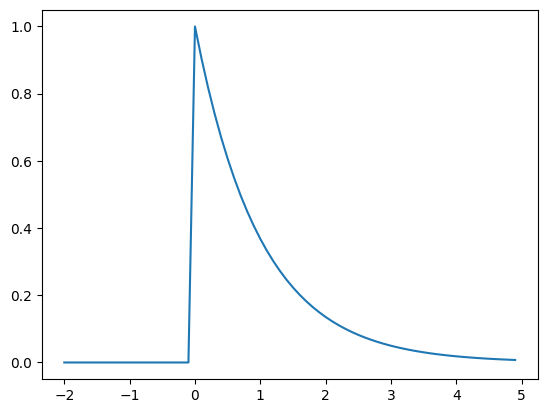

In [ ]:
exp_decay_v = np.vectorize(exp_decay, otypes=[float])
x = np.arange(-2,5, 0.1)
y = exp_decay_v(x, a = 1)
plt.plot(x,y)

# Derivative (finite difference)




$$f'(x) = lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$$

In [ ]:
def my_function(x):
    return x**2

h = 0.00000001
x = 1
(my_function(x+h) - my_function(x))/h

1.999999987845058

# Integrate

https://docs.scipy.org/doc/scipy/tutorial/integrate.html

## Integrate using function

`integrate.quad(function, lower limit, upper limit)`

$$\int^1_0 x^2 = x^3/3 = \frac{1}{3} $$

In [ ]:
import scipy.integrate as integrate

def my_function(x):
    return x**2

results, _ = integrate.quad(my_function, 0, 1)
print(results)

0.33333333333333337


In [ ]:
def my_function(x):
    return np.exp(-x)

results, _ = integrate.quad(my_function, 0, np.inf)
print(results)

1.0000000000000002


`integrate.dblquad(function, lower_limit 1, upper_limit 1, lower_limit 2, upper_limit 2)`

$$ \int^1_{x=0} \int_{y=0}^2 xy = \frac{x^2}{2}\frac{y^2}{2} = 1$$

In [ ]:
def my_function(x,y):
    return x*y

integrate.dblquad(my_function, 0, 1, 0, 2)

(0.9999999999999999, 2.2156245316493716e-14)

## Integrate when we dont have function (numerical integration)

### trapezoid

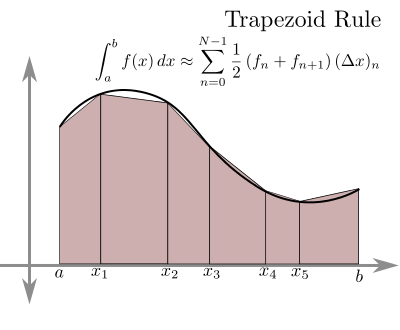

In [ ]:
## Integrate when we dont have function
import scipy.integrate as integrate

def my_function(x):
    return x**2

x = np.array([0,0.5, 1])
# x = np.linspace(0,1,100)
y = my_function(x)
integrate.trapezoid(y, x)


0.375

$$\frac{1}{2} × 0.5 ×0.25 + \frac{1}{2} × 0.5 × 0.75 + 0.25 × 0.5 $$

$$0.0625 + 0.1875 + 0.125 = 0.375 $$

### simpson

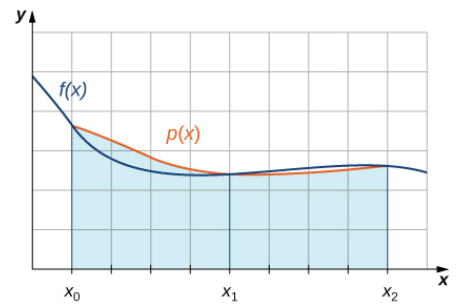

In [ ]:
## Integrate when we dont have function
import scipy.integrate as integrate

def my_function(x):
    return x**2

x = np.array([0,0.5,1])
# x = np.linspace(0,1,100)
y = my_function(x)
integrate.simpson(y, x)


0.3333333333333333

## Error function erf(x)

$$erf(x) = \frac{2}{\sqrt{π}} ∫^x_0 {e^{-y^2} dy}$$

In [ ]:
def my_integral(y):
    return np.exp(-y**2)

def erf(x):
    return integrate.quad(my_integral, 0, x)[0] * 2 / np.sqrt(np.pi)

erf_v = np.vectorize(erf)

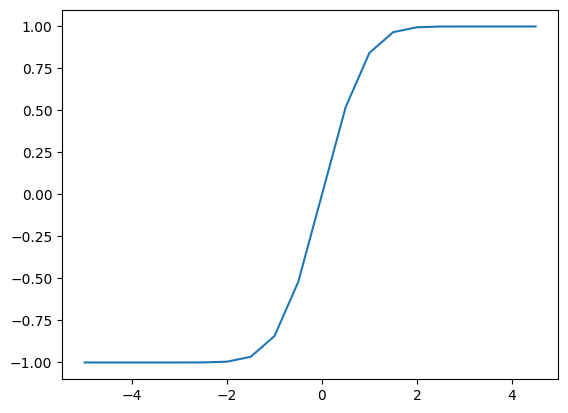

In [ ]:
x = np.arange(-5, 5, 0.5)
y = erf_v(x)
plt.plot(x,y)

## Example

### Sketch the graph of $e^{-|x|}$

In [ ]:
x = np.arange(-5, 5, 0.5)

# Your code here
def your_function(x,a = 1):

    return 0


### Sketch the graph of $q_a=\begin{cases}
    1-\frac{|x|}{a}, & x\le a\\
    0, & x>a.
  \end{cases}$

In [ ]:
x = np.arange(-5, 5, 0.5)

# Your code here
def your_function(x, a = 1):

    return 0


## Translation and reflection

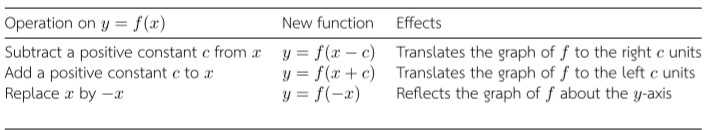

In [ ]:
# Suppose we have a pre-defined function below
# write the code for translation and reflection

def exp_decay(x, a = 1):
    if x>=0:
        return  np.exp(-a*x)
    else:
        return 0

def right_translation(x,y, translation = 0):
    return x+translation, y

exp_decay_v = np.vectorize(exp_decay, otypes=[float])


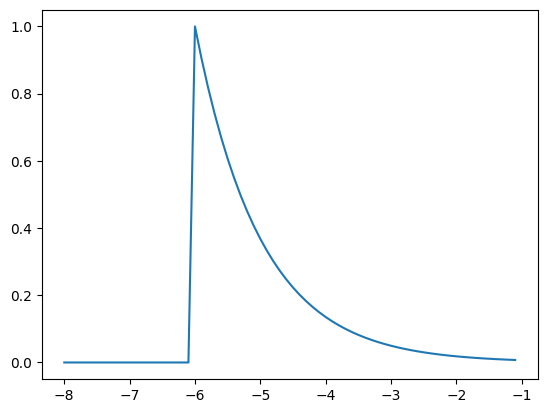

In [ ]:

x = np.arange(-2,5, 0.1)
y = exp_decay_v(x, a = 1)

x,y = right_translation(x,y, translation = -6)
plt.plot(x,y)

### Quiz
write code for reflection

In [ ]:
# Your code here
# write code for reflection
def reflection(x,y):
    return x,y

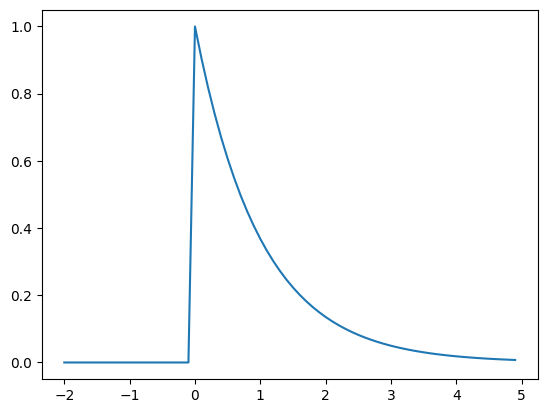

In [ ]:
x = np.arange(-2,5, 0.1)
y = exp_decay_v(x, a = 1)

x,y = reflection(x,y)
plt.plot(x,y)

# Fourier transform property



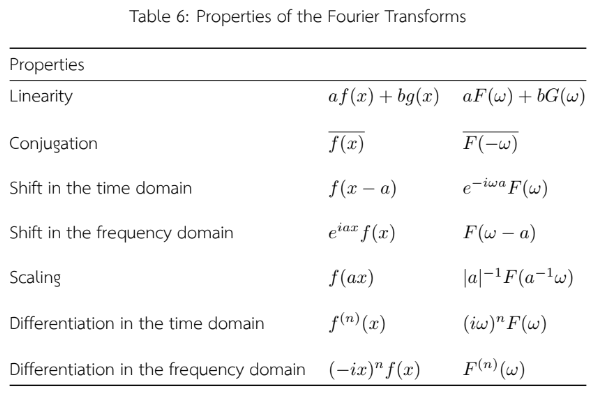

## Convolution theorem

$$F(f\ast g)(ω) = F(ω)G(ω)$$

https://en.wikipedia.org/wiki/Convolution

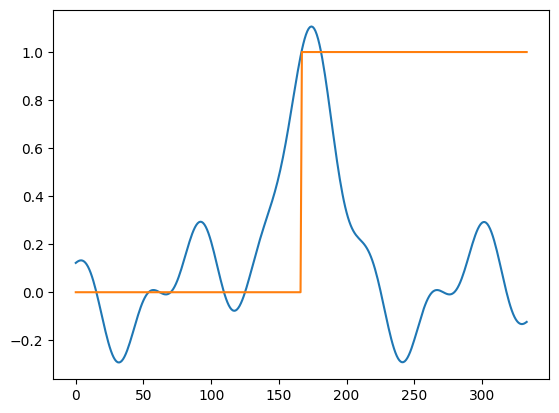

In [ ]:
x = np.arange(-5,5,0.03)

# signal.gaussian(จำนวนข้อมูล, std)
f = signal.gaussian(len(x), std=20) + np.sin(x*2)*0.2 + np.sin(x*5)*0.1

"""
                      0   if x1 < 0
heaviside(x1, x2) =  x2   if x1 == 0
                      1   if x1 > 0
"""
g = np.heaviside(x, 1)

plt.plot(f)
plt.plot(g)

$$f(x)\ast g (x)$$

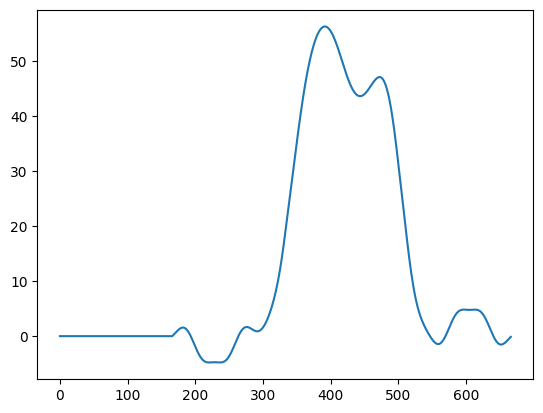

In [ ]:
conv_results = np.convolve(f,g)
plt.plot(conv_results)

### Discrete Fourier transform

In [ ]:
my_signal = np.array([1,2,3,4,3,2,1,0])
fft(my_signal)

array([16.        -0.j        , -4.82842712-4.82842712j,
        0.        -0.j        ,  0.82842712-0.82842712j,
        0.        -0.j        ,  0.82842712+0.82842712j,
        0.        +0.j        , -4.82842712+4.82842712j])

In [ ]:
fftfreq(len(my_signal), d = 1)

array([ 0.   ,  0.125,  0.25 ,  0.375, -0.5  , -0.375, -0.25 , -0.125])

In [ ]:
fourier_conv = fftshift(fft(conv_results))

freq_conv = fftshift(fftfreq(len(conv_results)))

# pad signal by zero
f_pad = np.pad(f, (len(f), 0), 'constant', constant_values=0)
g_pad = np.pad(g, (len(g), 0), 'constant', constant_values=0)
fourier_f = fftshift(fft(f_pad))
freq_f = fftshift(fftfreq(len(f_pad)))
fourier_g = fftshift(fft(g_pad))


$$\mathcal{F}(f(x)\ast g (x))$$

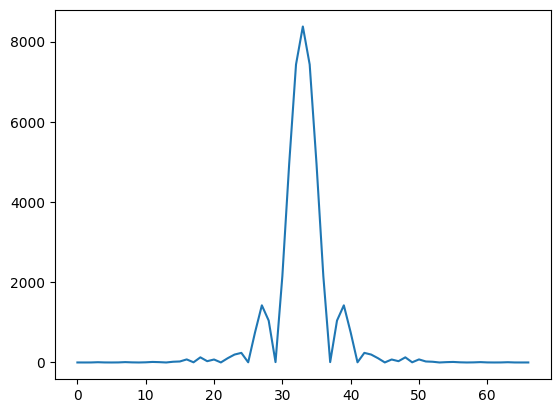

In [ ]:
plt.plot( np.abs(fourier_conv)[(freq_conv>-0.05)& (freq_conv<0.05)] )

$$\mathcal{F}(f(x)) × \mathcal{F}(g(x))$$

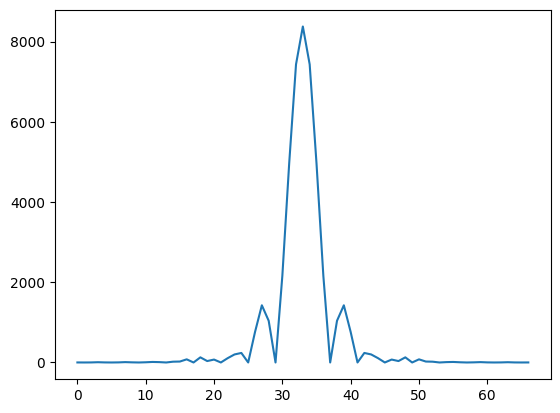

In [ ]:
plt.plot(np.abs(fourier_g * fourier_f)[(freq_f>-0.05)& (freq_f<0.05)] )

$$\mathcal{F}^{-1}(F(ω)G(ω))$$

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


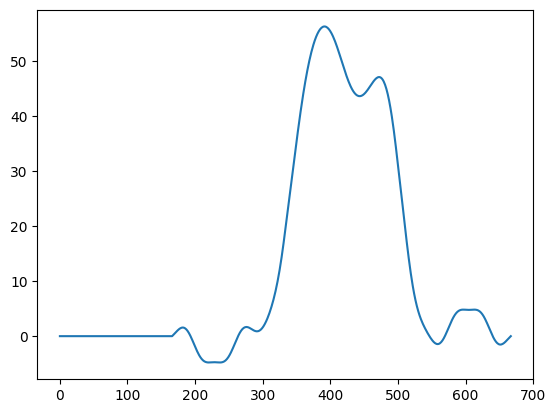

In [ ]:
f_g = ifft(ifftshift(fourier_g) * ifftshift(fourier_f))
plt.plot(f_g)

# Garcia paper

$$d_m(x) = ∫^{∞}_{-∞} d(y) k(x-y)dy$$

Given $d_m$ and $k$, find $d$

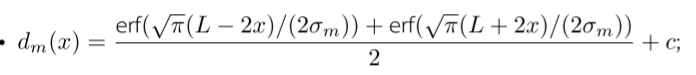

In [ ]:
def my_integral(y):
    return np.exp(-y**2)

def erf(x):
    return integrate.quad(my_integral, 0, x)[0] * 2 / np.sqrt(np.pi)

def d(x, L, sigma, c = 0):
    return (erf(np.sqrt(np.pi) * (L-2*x) / (2*sigma)) + erf(np.sqrt(np.pi) * (L+2*x) / (2*sigma)))/2 + c

d_v = np.vectorize(d, otypes=[float])

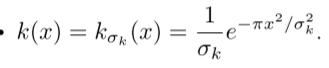

In [ ]:
def k(x, sigma):
    return 1/sigma * np.exp(-np.pi * x**2/sigma**2)

k_v = np.vectorize(k, otypes=[float])

In [ ]:
L = 1
sigma_m = 1
sigma_k = 1
sigma_star = np.sqrt(sigma_m**2 + sigma_k**2)

x = np.linspace(-5,5,300)
x_kernel = np.linspace(-10,10)/12

data_d = d_v(x, L, sigma_star , c = 0)

data_k = k_v(x_kernel, sigma_k)

data_d_m = np.convolve(data_d, data_k, mode='full')



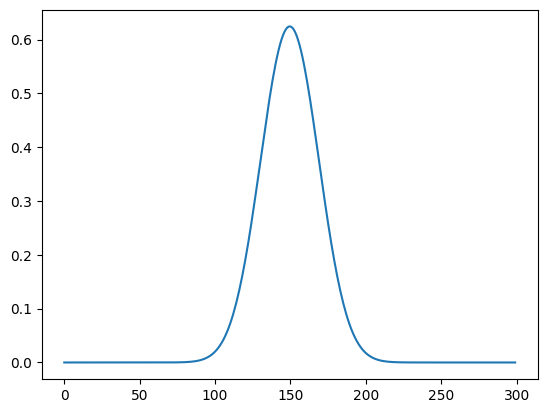

In [ ]:
plt.plot(data_d)

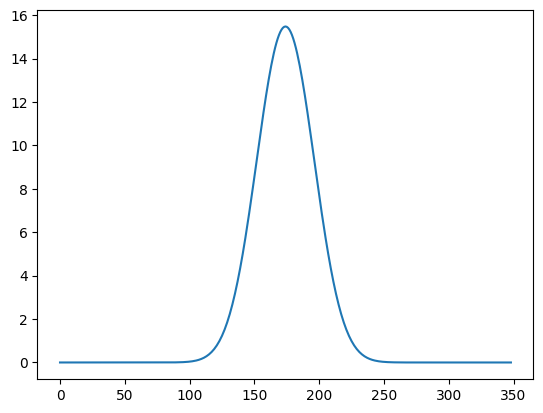

In [ ]:
plt.plot(data_d_m)

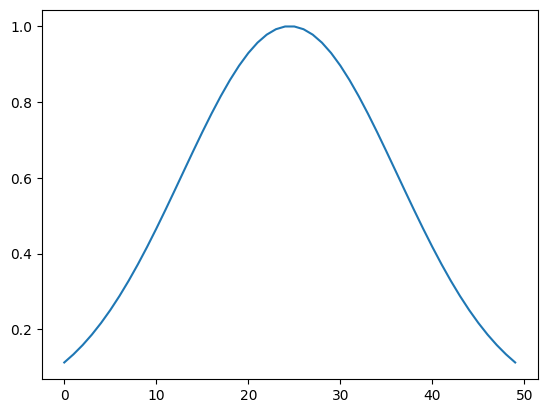

In [ ]:
plt.plot(data_k)

In [ ]:
recovered, remainder = signal.deconvolve(data_d_m, data_k)


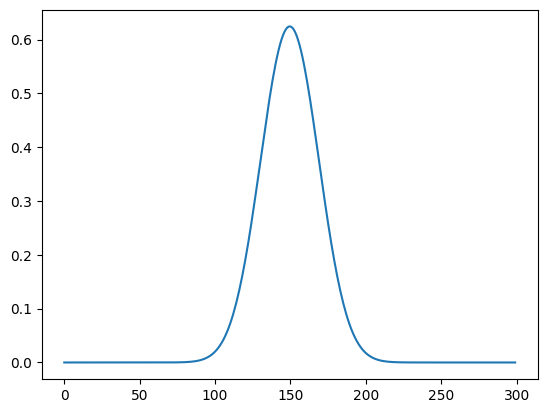

In [ ]:
plt.plot(recovered)

# Monte carlo method

Monte Carlo methods are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results.

การหาค่า π



*   random ข้อมูล location ในสี่เหลี่ยมพื้นผ้า (random จุด x และ y)
*   นับว่าจุดที่อยู่ห่างจากศูนย์กลางน้อยกว่ารัศมีมีกี่จุด และจุดทั้งหมดมีกี่จุด
*   หาอัตราส่วนระหว่างจุดในวงกลมกับจุดทั้งหมด
*   เทียบบัญญัติไตรยางค์เพื่อหาค่า pi





In [ ]:
number_of_point = 1000
r = 1

x = np.random.uniform(-1,1, number_of_point)
y = np.random.uniform(-1,1, number_of_point)

$$r = \sqrt{x^2 + y^2}$$

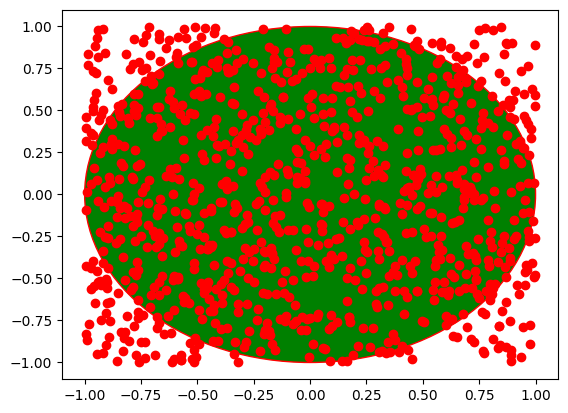

In [ ]:

circle=plt.Circle(( 0 , 0 ), 1, facecolor='green', edgecolor='red')

plt.gca().add_patch(circle)
plt.scatter(x,y, c = 'red')

In [ ]:
point_r = np.sqrt(x**2 + y**2)
inside_circle_point = len(point_r[point_r<=r])
all_point = len(point_r)

สี่เหลี่ยมมีพื้นที่ 2 × 2 = 4

In [ ]:

# estimate pi
inside_circle_point/all_point*4

3.144

# Other library

*   https://www.sympy.org/en/index.html
*   List item

